In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

sourcedir = 'Alyrata/'

dl = os.listdir('Alyrata/')
print(dl)



['all.repeats.from.11B21.Chr1.fasta.csv', 'all.repeats.from.11B21.Chr2.fasta.csv', 'all.repeats.from.11B21.Chr3.fasta.csv', 'all.repeats.from.11B21.Chr4.fasta.csv', 'all.repeats.from.11B21.Chr5.fasta.csv', 'all.repeats.from.11B21.Chr6.fasta.csv', 'all.repeats.from.11B21.Chr7.fasta.csv', 'all.repeats.from.11B21.Chr8.fasta.csv', 'all.repeats.from.MN47.Chr1.fasta.csv', 'all.repeats.from.MN47.Chr2.fasta.csv', 'all.repeats.from.MN47.Chr3.fasta.csv', 'all.repeats.from.MN47.Chr4.fasta.csv', 'all.repeats.from.MN47.Chr5.fasta.csv', 'all.repeats.from.MN47.Chr6.fasta.csv', 'all.repeats.from.MN47.Chr7.fasta.csv', 'all.repeats.from.MN47.Chr8.fasta.csv', 'all.repeats.from.NT1.Chr1.fasta.csv', 'all.repeats.from.NT1.Chr2.fasta.csv', 'all.repeats.from.NT1.Chr3.fasta.csv', 'all.repeats.from.NT1.Chr4.fasta.csv', 'all.repeats.from.NT1.Chr5.fasta.csv', 'all.repeats.from.NT1.Chr6.fasta.csv', 'all.repeats.from.NT1.Chr7.fasta.csv', 'all.repeats.from.NT1.Chr8.fasta.csv']


In [1]:
for f in dl:
    myfile=pd.read_csv('Alyrata/%s'%(f))
    myfile.head(n=5)
    myfile['chromosome'].unique()
    acc=myfile['fasta.file.name'].iloc[0] 
    #print(acc)
    acc=acc.partition('.')
    #print(acc)
    acc=acc[0]
    print(acc)
    myfile['name']=acc
    myfile['end']= myfile['end'].astype(int)
    myfile['name']=myfile[['name','chromosome', 'start', 'end', 'width']].astype(str).agg('-'.join, axis=1)
    myfile.head(n=3)
    myfile_160=myfile[(myfile['width'] >= 145) & (myfile['width'] <= 165)] #changed from 155 for Alyrata
    myfile_160 =myfile_160.drop_duplicates(subset=['chromosome', 'seq'])
    myfile_180=myfile[(myfile['width'] >= 165) & (myfile['width'] <= 185)] #changed from 175 for Alyrata
    myfile_180 =myfile_180.drop_duplicates(subset=['chromosome', 'seq'])
    out=open('%s_cen160.fasta'%(acc),'w')
    out2=open('%s_cen180.fasta'%(acc),'w')
    for index, row in myfile_160.iterrows():
        name=row[9]
        sequence=row[3]
        out.write(">" + str(name) + "\n" + str(sequence) + '\n')
    out.close()
    for index, row in myfile_180.iterrows():
        name=row[9]
        sequence=row[3]
        out2.write(">" + str(name) + "\n" + str(sequence) + '\n')
    out2.close()
    


NameError: name 'myfile' is not defined

In [30]:
myfile=pd.read_csv('Alyrata/all.repeats.from.NT1.Chr8.fasta.csv')
myfile.head(n=5)
myfile_160=myfile[(myfile['width'] >= 166) & (myfile['width'] <=172)]
myfile_180=myfile[(myfile['width'] >= 176) & (myfile['width'] < 182)]
myfile_160_u =myfile_160.drop_duplicates(subset=['region.name', 'seq'])
myfile_180_u = myfile_180.drop_duplicates(subset=['region.name', 'seq'])
print(len(myfile_160))
print(len(myfile_180))
print(len(myfile_160_u))
print(len(myfile_180_u))


7456
6
2902
4


<AxesSubplot:xlabel='width', ylabel='Count'>

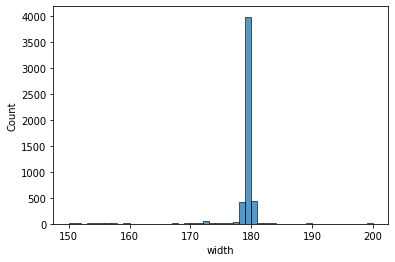

In [10]:
sns.histplot(myfile_repeat['width'], binwidth=1)

In [11]:
myfile.head(n=5)

,x,start,end,strand,seq,width,class,region.name
0,ACAAAATTAGGTCCACAAAATACAAAATATTTTTTGGCGGGAAAAG...,204422,204562,+,ACAAAATTAGGTCCACAAAATACAAAATATTTTTTGGCGGGAAAAG...,141,NaN,11B21.Chr1.fasta_scaffold_1_RagTag
1,TTGGCGTTAAATTTTTGGCGGGAAAAATTTACAAGGTATTTTAAAG...,204601,204666,-,ATAAATACCCTGTAAAAACCCTTTAAAATACCTTGTAAATTTTTCC...,66,NaN,11B21.Chr1.fasta_scaffold_1_RagTag
2,TTGGCGGGAAAAATTTACAAGGTATTTTAAAGGGTTTTTACAGGGT...,204667,204738,-,AAAATCTTATAATATCTTATAAACTCTTTATAAATACGTTGTAAAA...,72,NaN,11B21.Chr1.fasta_scaffold_1_RagTag
3,ATAAAACCTTATAAGTACCTTGTAAAATCTTTTAAAATACATTGTA...,204817,204945,+,ATAAAACCTTATAAGTACCTTGTAAAATCTTTTAAAATACATTGTA...,129,NaN,11B21.Chr1.fasta_scaffold_1_RagTag
4,TTGGCGGGAAAAATTTTTACGGGAAAATTTTACAAGGTATTTTAAA...,205014,205144,-,ACAAAATTAGGTCCACAAAATACAAAATATTTTTTGGCGGGAAAAG...,131,NaN,11B21.Chr1.fasta_scaffold_1_RagTag
